## [Modelo] Segmentación DBSCAN

#### Caso:

Dado que los clientes reciben diversas ofertas de consumo para que estos puedan transaccionar con su tarjeta de crédito y débito, la entidad bancaria no está segura si sus clientes tienen algún interes en sus ofertas, teniendo en cuenta que cada oferta ya corresponde un gasto para la entidad.

Por tanto: Se pide realizar un estudio de segmentación para conocer cuáles son las preferencias de consumo que sus clientes optarían para comunicarles ofertas más direccionadas.

### 1. Librerias

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = (7, 4)
plt.style.use('ggplot')
pd.options.display.max_columns = None #Para que se visualicen todas las variables
import os

### 2. Extracción Base de datos

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [3]:
#Repositorios
path = '/gdrive/MyDrive/BQ - Data Science/BQ - Repositorios/DMC/Machine Learning/ML No Supervisado'
filename = "02dataBaseConsumo.txt"
fullpath = os.path.join(path, filename)

In [4]:
dataFramePre = pd.read_csv(fullpath,delimiter='|', encoding='latin-1')
print(dataFramePre.head())

   codmes  cliente       edad      ingreso sexo  flgLimaProv  flgAfBxi  \
0  201611    32572  [1. <=25]  [2. <=1500]    F          1.0       1.0   
1  201611    29843  [1. <=25]  [3. <=2500]    F          0.0       1.0   
2  201611    30033  [2. <=30]  [2. <=1500]    F          0.0       1.0   
3  201612     3847  [7. > 55]  [3. <=2500]    M          1.0       0.0   
4  201611    33131  [1. <=25]  [2. <=1500]    F          1.0       1.0   

   grupoGiro  monto  trx  
0    restbar     12    1  
1  prodlocal     22    1  
2    restbar     10    1  
3    restbar    350    4  
4    restbar     65    2  


In [5]:
dataFramePre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339476 entries, 0 to 339475
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   codmes       339476 non-null  int64  
 1   cliente      339476 non-null  int64  
 2   edad         326477 non-null  object 
 3   ingreso      308148 non-null  object 
 4   sexo         327721 non-null  object 
 5   flgLimaProv  327725 non-null  float64
 6   flgAfBxi     327725 non-null  float64
 7   grupoGiro    339476 non-null  object 
 8   monto        339476 non-null  int64  
 9   trx          339476 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 25.9+ MB


### 3. Metodología

In [ ]:
#### 3.1 Análisis Previo (objetivo)
#### 3.2 Exploración (descriptivo, grafico barras,cajas)
#### 3.3 Transformación (standarización,cajas)
#### 3.4 Outliers (analisis y eliminación de outliers)
#### 3.5 Dimensionamiento (PCA)
#### 3.6 Modelamiento
#### 3.7 Evaluación
#### 3.8 Perfilamiento
#### 3.9 Visualización

#### 3.1 Análisis Previo

Qué clase de rubros de consumo tenemos?

In [6]:
copy = pd.DataFrame()
rubroResum = pd.DataFrame()

copy = dataFramePre
rubroResum["ctdTrx"] = copy.groupby("grupoGiro").agg("trx").sum()

print('Cantidad de Rubros: '+str(rubroResum.shape[0]))
print('\n')
print(rubroResum.sort_values("ctdTrx",ascending=False))

Cantidad de Rubros: 22


                 ctdTrx
grupoGiro              
prodsuper        142313
restbar          103507
salud             63109
vehrep            45978
entretenimiento   43009
tiendadepar       37290
ropamoda          28205
prodpersondiv     15649
telcom            12606
financiero         9889
transplaerea       8992
clubmkt            8626
prodlocal          6966
enseñanza          5897
belleza            5445
prodelectro        4989
alqbienes          3528
artcultura         3307
profdiverso        2685
hogaroficina       1584
**                  255
informatica          89


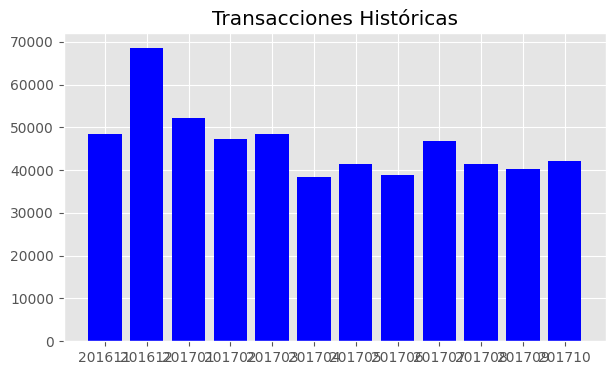

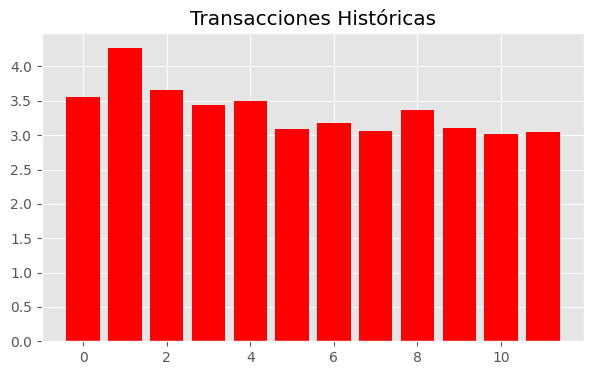

In [7]:
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['ctdCliente'] = copy.groupby('codmes').agg('cliente').nunique()
cantidadGrupo['ctdTrx']= copy.groupby('codmes').agg('trx').sum()
cantidadGrupo['promTrxCli'] = round(cantidadGrupo['ctdTrx']/cantidadGrupo['ctdCliente'],2)

fig = plt.figure() # Figure
ax = fig.add_subplot(111) # Axes
plt.bar(range(len(cantidadGrupo.index)),cantidadGrupo['ctdTrx'],color='blue')
plt.title('Transacciones Históricas')
ax.set_xticks(range(len(cantidadGrupo.index)))
ax.set_xticklabels(cantidadGrupo.index)
plt.show()

ax = fig.add_subplot(121) # Axes
plt.bar(range(len(cantidadGrupo.index)),cantidadGrupo['promTrxCli'],color='red')
plt.title('Transacciones Históricas')
ax.set_xticks(range(len(cantidadGrupo.index)))
ax.set_xticklabels(cantidadGrupo.index)
plt.show()

### Qué valores es recomnedable usar para el estudio?

[Analisis Previo](https://docs.google.com/spreadsheets/d/1isGDQgq_DGqtzNEFEUSnlfd-bbQ5tznOX3ALYmY9ERk/edit#gid=1518700033)

In [ ]:
# Los graficos no cambian mucho, se nota que diciembre tienen un comportamiento atipico

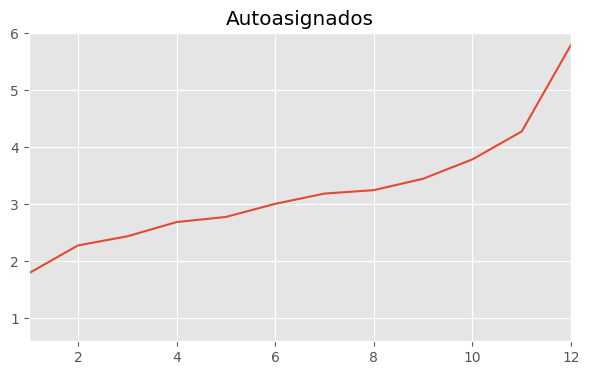

           ctdCliente  ctdTrx  ctdTrxMes  promTrxCli
frecMeses                                           
1               11461   20497   20497.00        1.79
2                6626   30243   15121.50        2.28
3                4578   33569   11189.67        2.44
4                3437   36978    9244.50        2.69
5                2702   37495    7499.00        2.78
6                2176   39250    6541.67        3.01
7                1773   39623    5660.43        3.19
8                1584   41168    5146.00        3.25
9                1310   40729    4525.44        3.45
10               1281   48600    4860.00        3.79
11               1249   58841    5349.18        4.28
12               1823  126925   10577.08        5.80


In [8]:
cantidadGrupo = pd.DataFrame()
cantidadGrupo2 = pd.DataFrame()

cantidadGrupo['frecMeses']=copy.groupby('cliente').agg('codmes').nunique()
cantidadGrupo['sumTrx']=copy.groupby('cliente').agg('trx').sum()

cantidadGrupo2['ctdCliente']=cantidadGrupo.groupby('frecMeses').size()
cantidadGrupo2['ctdTrx']=cantidadGrupo.groupby('frecMeses').agg('sumTrx').sum()
cantidadGrupo2['ctdTrxMes']=round(cantidadGrupo2['ctdTrx']/cantidadGrupo2.index,2)
cantidadGrupo2['promTrxCli']=round(cantidadGrupo2['ctdTrxMes']/cantidadGrupo2['ctdCliente'],2)

# Grafico de linea
plt.plot(cantidadGrupo2['promTrxCli'])
plt.xlim(1,12)
plt.ylim(0.6)
plt.title('Autoasignados')
plt.show()
print(cantidadGrupo2)

In [14]:
cantidadGrupo.head(3)

,cliente,frecMeses,sumTrx
0,1,10,38
1,2,10,58
2,3,12,42


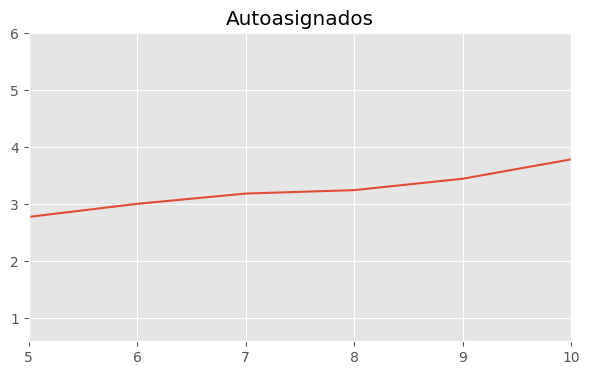

           ctdCliente  ctdTrx  ctdTrxMes  promTrxCli
frecMeses                                           
1               11461   20497   20497.00        1.79
2                6626   30243   15121.50        2.28
3                4578   33569   11189.67        2.44
4                3437   36978    9244.50        2.69
5                2702   37495    7499.00        2.78
6                2176   39250    6541.67        3.01
7                1773   39623    5660.43        3.19
8                1584   41168    5146.00        3.25
9                1310   40729    4525.44        3.45
10               1281   48600    4860.00        3.79
11               1249   58841    5349.18        4.28
12               1823  126925   10577.08        5.80


In [10]:
# Grafico de linea (observando comportamiento frecuente)
plt.plot(cantidadGrupo2['promTrxCli'])
plt.xlim(5,10)
plt.ylim(0.6)
plt.title('Autoasignados')
plt.show()
print(cantidadGrupo2)

Luego del análisis de datos con respecto a la transacción en su historia, iniciamos la construcción de nuestra Matriz de Segmentación. Por tanto llevaremos nuestra base de datos a nivel de "cliente" y creando variables de rubro de consumo.

In [12]:
# Reinicio de índice "df.reset_index()"
copy=dataFramePre
dataFrame = pd.DataFrame()

dataFrame['trxGrupoGiro']=copy.groupby(["cliente","grupoGiro","edad","ingreso","sexo"]).agg("trx").sum()
dataFrame = pd.pivot_table(dataFrame,'trxGrupoGiro',['cliente',"edad","ingreso","sexo"],'grupoGiro')
dataFrame = dataFrame.fillna(0)
dataFrame.head()

,,,grupoGiro,**,alqbienes,artcultura,belleza,clubmkt,enseñanza,entretenimiento,financiero,hogaroficina,informatica,...,prodpersondiv,prodsuper,profdiverso,restbar,ropamoda,salud,telcom,tiendadepar,transplaerea,vehrep
cliente,edad,ingreso,sexo,,,,,,,,,,,,,,,,,,,,,
1,[7. > 55],[3. <=2500],M,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,10.0,0.0,7.0,2.0,3.0,0.0,2.0,0.0,10.0
2,[7. > 55],[8. > 8000],M,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,3.0,12.0,0.0,33.0,4.0,3.0,0.0,2.0,0.0,0.0
3,[7. > 55],[4. <=3500],M,0.0,4.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,2.0,2.0,0.0,11.0,5.0,7.0,1.0,0.0,0.0,8.0
4,[7. > 55],[6. <=6000],M,0.0,0.0,0.0,0.0,0.0,0.0,3.0,19.0,0.0,0.0,...,2.0,27.0,1.0,3.0,0.0,0.0,9.0,1.0,0.0,100.0
5,[7. > 55],[6. <=6000],M,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
dataFrame = dataFrame.reset_index()
cantidadGrupo = cantidadGrupo.reset_index()

dataFrame["frecMeses"] = cantidadGrupo["frecMeses"]

# Eliminando los valores autoasignados por no ser estables:
dataFrame = dataFrame[dataFrame["frecMeses"]>=5]
dataFrame = dataFrame[dataFrame["frecMeses"]<=10]
print(dataFrame.head())

grupoGiro  cliente       edad      ingreso sexo   **  alqbienes  artcultura  \
0                1  [7. > 55]  [3. <=2500]    M  0.0        1.0         0.0   
1                2  [7. > 55]  [8. > 8000]    M  0.0        0.0         0.0   
5                6  [7. > 55]  [3. <=2500]    M  0.0        0.0         0.0   
8                9  [7. > 55]  [4. <=3500]    F  0.0        0.0         0.0   
10              11  [7. > 55]  [4. <=3500]    M  0.0        0.0         0.0   

grupoGiro  belleza  clubmkt  enseñanza  ...  prodsuper  profdiverso  restbar  \
0              2.0      0.0        0.0  ...       10.0          0.0      7.0   
1              0.0      0.0        1.0  ...       12.0          0.0     33.0   
5              0.0      0.0        0.0  ...        3.0          0.0      0.0   
8              1.0      0.0        0.0  ...       13.0          0.0      3.0   
10             0.0      0.0        0.0  ...        1.0          0.0      1.0   

grupoGiro  ropamoda  salud  telcom  tiendade

In [15]:
# Variables objetivo de estudio:
rubroName = ['prodsuper', 'restbar', 'salud', 'vehrep', 'entretenimiento', 'tiendadepar', 'ropamoda', 'prodpersondiv',
               'telcom','financiero', 'transplaerea','clubmkt','prodlocal','enseñanza','belleza','prodelectro',
               'alqbienes','artcultura','profdiverso','hogaroficina','informatica','**']

In [16]:
print("Número de filas: " + str(dataFrame.shape[0]))
print("Número de columnas: " + str(dataFrame.shape[1]))

Número de filas: 10140
Número de columnas: 27


#### 3.2 Exploración

In [17]:
print(dataFrame[rubroName].describe())

grupoGiro     prodsuper       restbar         salud        vehrep  \
count      10140.000000  10140.000000  10140.000000  10140.000000   
mean           3.691716      2.549606      1.632051      1.216765   
std            9.258069      5.504099      4.682462      6.440480   
min            0.000000      0.000000      0.000000      0.000000   
25%            0.000000      0.000000      0.000000      0.000000   
50%            1.000000      1.000000      0.000000      0.000000   
75%            3.000000      3.000000      1.000000      0.000000   
max          229.000000     88.000000    102.000000    261.000000   

grupoGiro  entretenimiento   tiendadepar      ropamoda  prodpersondiv  \
count         10140.000000  10140.000000  10140.000000   10140.000000   
mean              1.203550      0.973274      0.719428       0.394280   
std               6.907515      2.481249      1.763253       1.644859   
min               0.000000      0.000000      0.000000       0.000000   
25%          

In [20]:
# Hay campos que tienen alta variabilidad

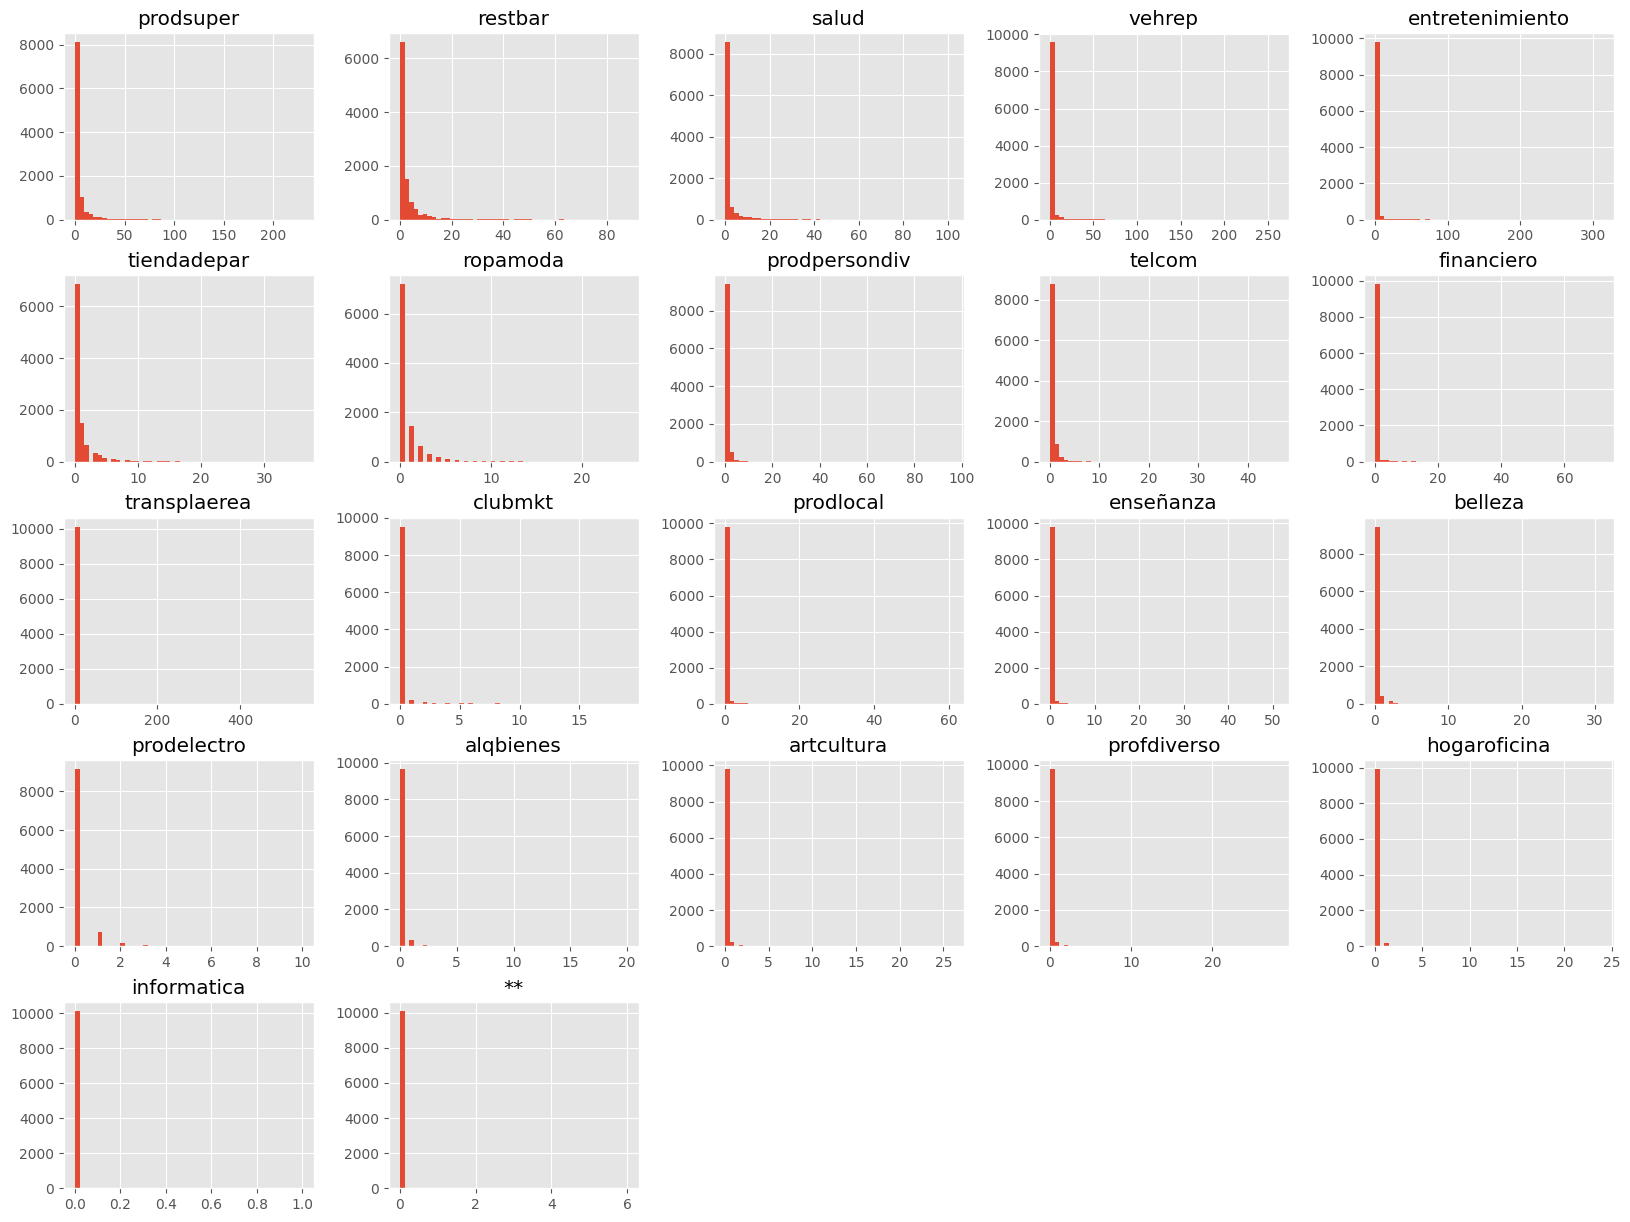

In [18]:
dataFrame[rubroName].hist(bins = 50, figsize=(20,15))
plt.show()

In [21]:
# Al parecer muchas variables tienen 0, pero se debe seguir analizando

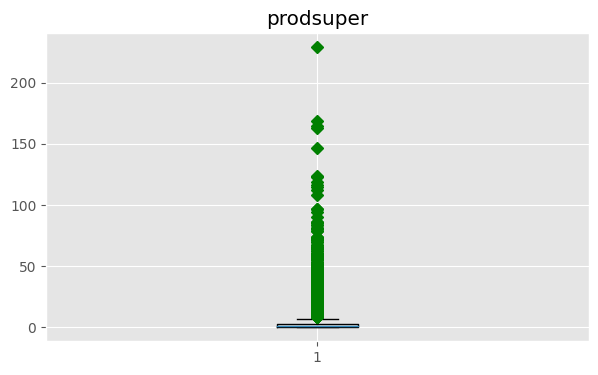

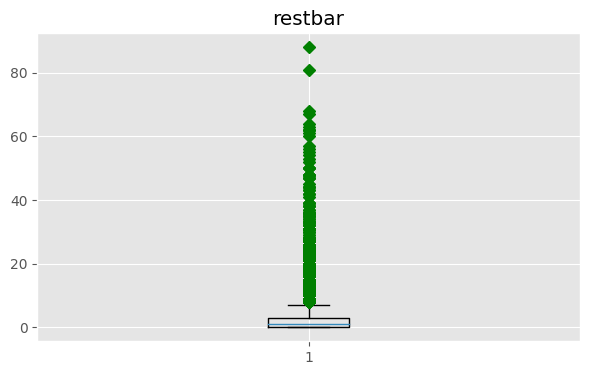

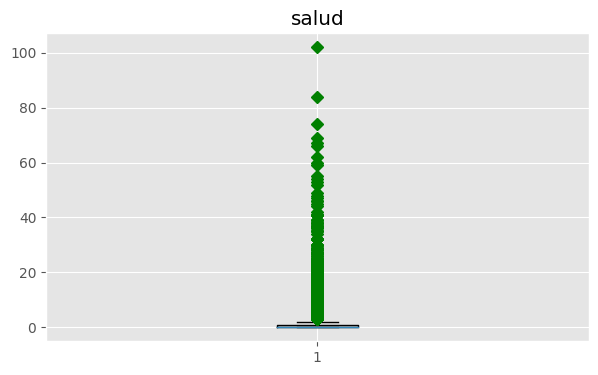

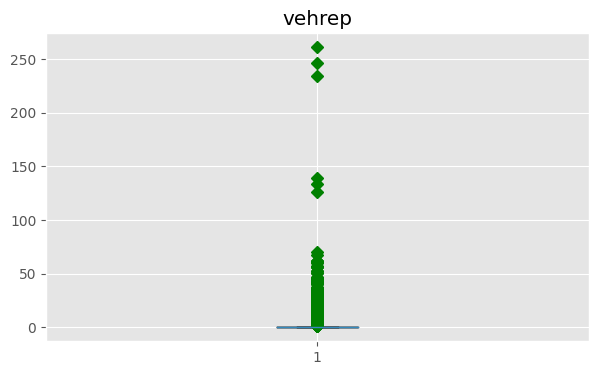

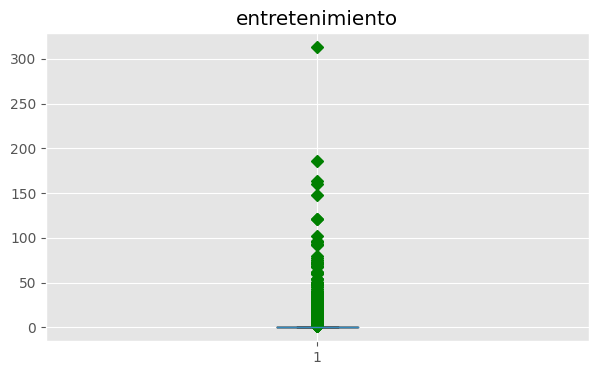

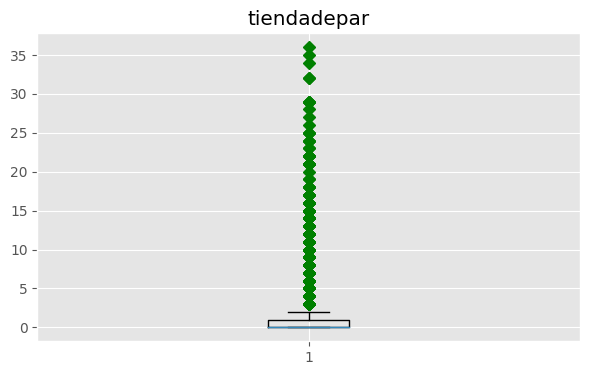

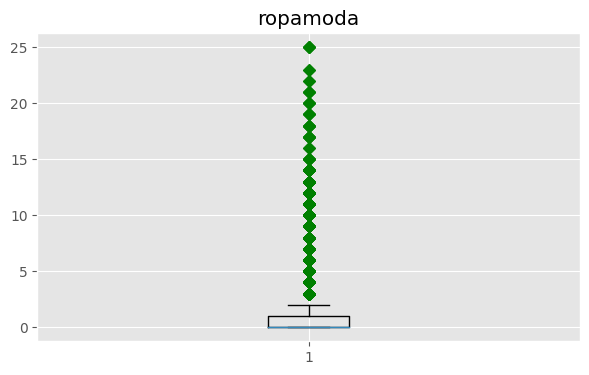

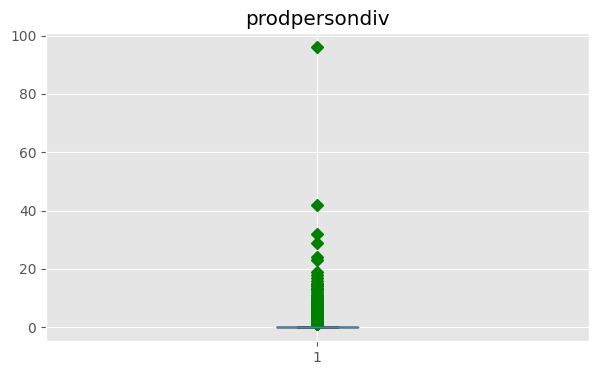

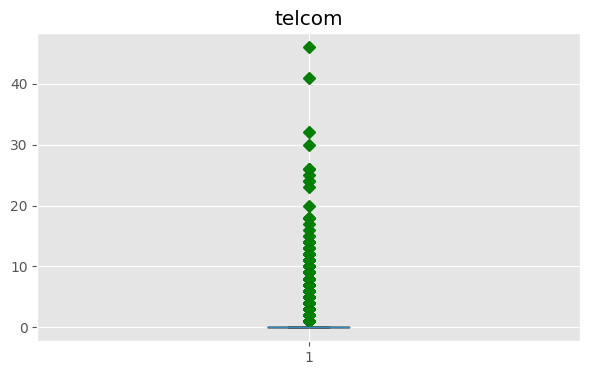

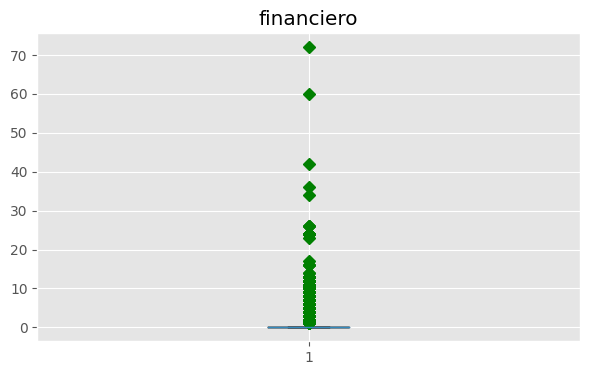

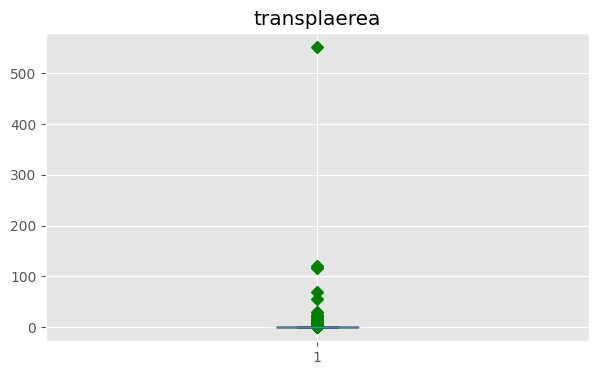

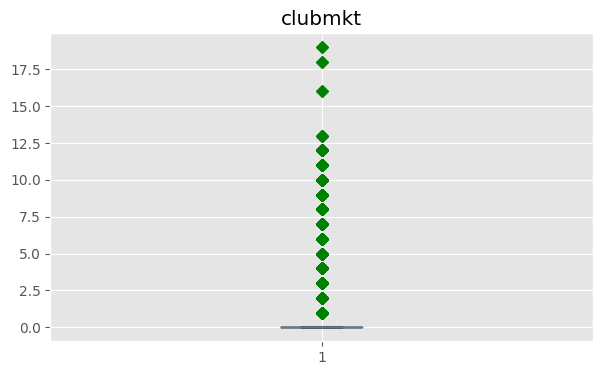

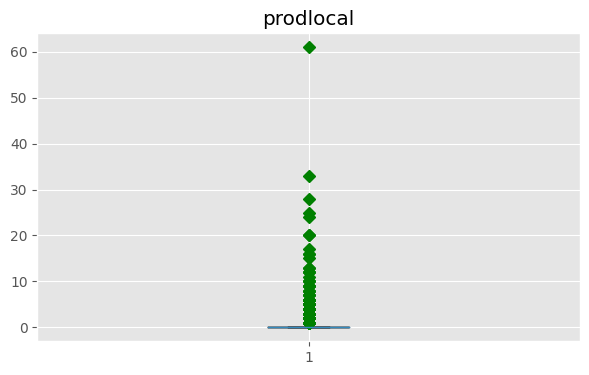

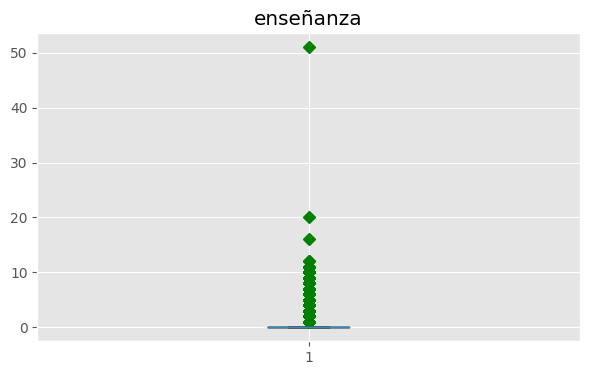

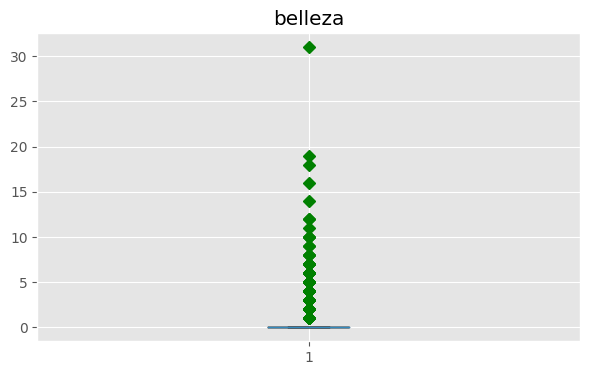

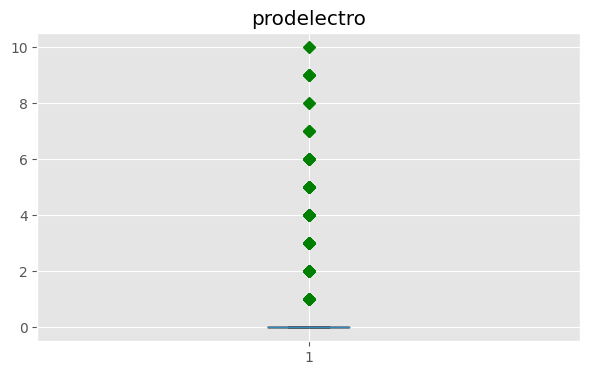

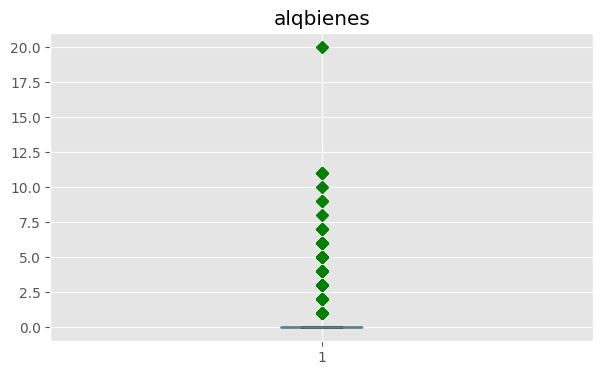

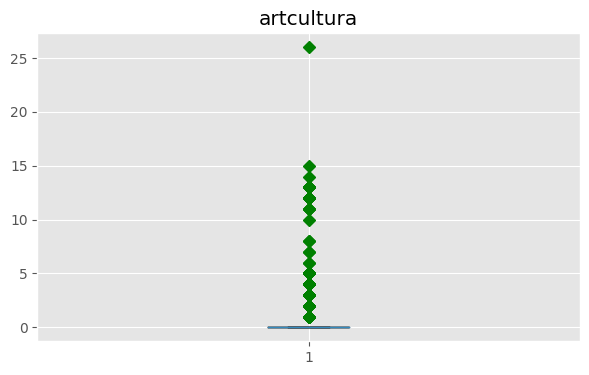

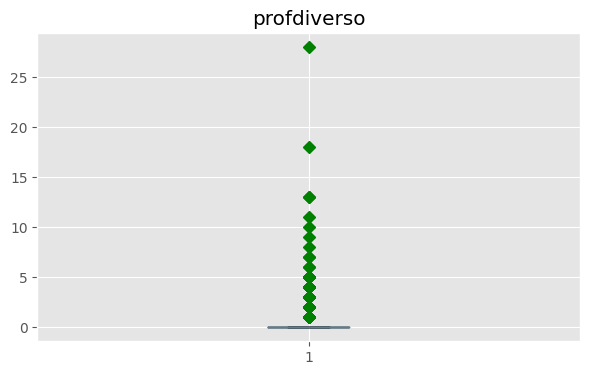

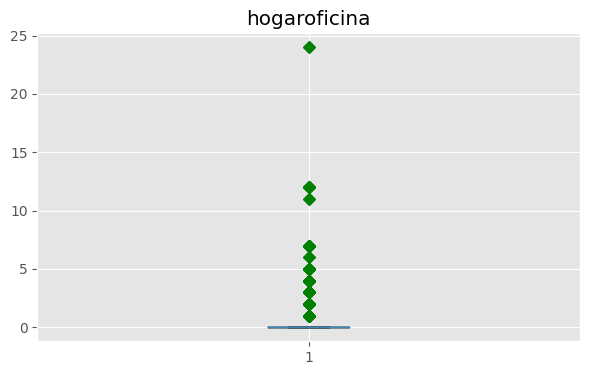

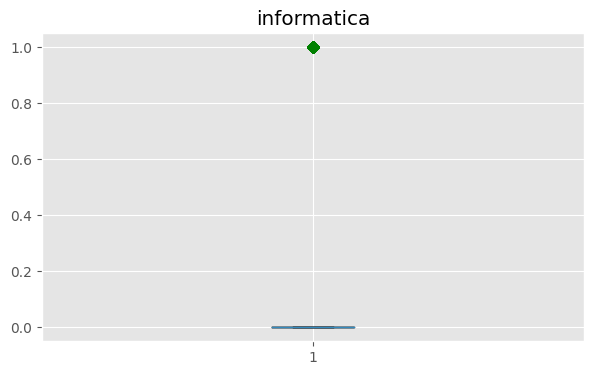

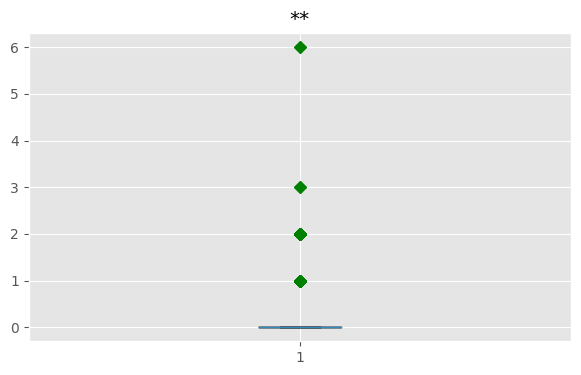

In [19]:
# Gráfico de cajas por variable en estudio:
for columnName in rubroName:
    plt.title(columnName)
    plt.boxplot(dataFrame[columnName], 0, 'gD')
    plt.show()

In [22]:
# Al parecer hay mucho outlier

#### 3.3 Transformación

In [23]:
# Como son cantidad de transaccion (no sabemos el minimo y el maximo) se debe estandarizar la data

In [24]:
# ------------------------------
# Creamos el objeto para escalar
# ------------------------------
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
#scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))

# ************
# Lo aplicamos
# ************
for columnName in rubroName:
    dataFrame[columnName] = scaler.fit_transform(dataFrame[columnName].values.reshape(-1, 1))

#for columnName in columName:
#    dataFrame[columnName] = dataFrame[columnName]/dataFrame['trx']

In [27]:
dataFrame[rubroName].head()

grupoGiro,prodsuper,restbar,salud,vehrep,entretenimiento,tiendadepar,ropamoda,prodpersondiv,telcom,financiero,transplaerea,clubmkt,prodlocal,enseñanza,belleza,prodelectro,alqbienes,artcultura,profdiverso,hogaroficina,informatica,**
0,0.681416,0.808600,0.292157,1.363822,-0.174246,0.413814,0.726291,-0.239716,-0.207350,-0.144425,-0.04547,-0.185701,0.707733,-0.164206,2.446600,-0.259153,1.782865,-0.106856,-0.119678,-0.087135,-0.039754,-0.052657
1,0.897454,5.532585,0.292157,-0.188934,-0.174246,0.413814,1.860614,1.584239,-0.207350,-0.144425,-0.04547,-0.185701,-0.161187,0.884312,-0.172405,-0.259153,-0.153537,-0.106856,-0.119678,-0.087135,-0.039754,-0.052657
5,-0.074719,-0.463242,-0.348563,0.587444,-0.174246,0.010772,-0.408032,-0.239716,2.541949,-0.144425,-0.04547,-0.185701,-0.161187,-0.164206,-0.172405,-0.259153,-0.153537,-0.106856,-0.119678,-0.087135,-0.039754,-0.052657
8,1.005474,0.081833,1.146451,-0.188934,-0.174246,6.459454,0.159130,0.368269,-0.207350,-0.144425,-0.04547,-0.185701,-0.161187,-0.164206,1.137097,3.470890,-0.153537,-0.106856,-0.119678,-0.087135,-0.039754,-0.052657
10,-0.290757,-0.281551,0.292157,-0.188934,-0.174246,0.010772,-0.408032,-0.239716,0.479975,0.397971,-0.04547,-0.185701,-0.161187,-0.164206,-0.172405,1.605868,-0.153537,-0.106856,-0.119678,-0.087135,-0.039754,-0.052657


#### 3.4 Outliers

In [ ]:
# Cálculo de intervalo del diagrama de cajas - Método de Rango Intercuartílico
#def calculateNumOutliars(serie):
#  Q01 = serie.quantile(0.25)
#  Q03 = serie.quantile(0.75)
#  IQR = Q03 - Q01
#  a = (serie < (Q01 - 1.5 * IQR)) | (serie > (Q03 + 1.5 * IQR))
#  numOutliars = a[a == True].shape[0]
#  return numOutliars

In [28]:
# Usamos el método de Z-score (considerando se distribuye Normalmente) --- para grandes volúmenes de datos
def calculateNumOutliars(serie):
    mu = serie.mean()
    desv = np.std(serie)
    a = ((serie-mu)/desv < -2) | ((serie-mu)/desv > 2)  # confiaza al 95% (1.96 aprox)
    numOutliars = a[a == True].shape[0]
    return a,numOutliars

In [29]:
numTotal = dataFrame.shape[0]
for columnName in rubroName:
    a,numOutliars = calculateNumOutliars(dataFrame[columnName])
    # Creamos nuevos campos para filtrar los Outliers
    dataFrame['flg_'+columnName]=a
    print('*'+columnName)
    if numOutliars > 0:
      print("Número de valores outliars: " + str(numOutliars))
      print("Porcentaje: " + str(np.round(numOutliars * 100 / numTotal, 2)) + "%")
    else:
      print("****No hay Outliers")
    print("\n")

*prodsuper
Número de valores outliars: 324
Porcentaje: 3.2%


*restbar
Número de valores outliars: 389
Porcentaje: 3.84%


*salud
Número de valores outliars: 388
Porcentaje: 3.83%


*vehrep
Número de valores outliars: 180
Porcentaje: 1.78%


*entretenimiento
Número de valores outliars: 142
Porcentaje: 1.4%


*tiendadepar
Número de valores outliars: 424
Porcentaje: 4.18%


*ropamoda
Número de valores outliars: 376
Porcentaje: 3.71%


*prodpersondiv
Número de valores outliars: 225
Porcentaje: 2.22%


*telcom
Número de valores outliars: 171
Porcentaje: 1.69%


*financiero
Número de valores outliars: 188
Porcentaje: 1.85%


*transplaerea
Número de valores outliars: 19
Porcentaje: 0.19%


*clubmkt
Número de valores outliars: 286
Porcentaje: 2.82%


*prodlocal
Número de valores outliars: 150
Porcentaje: 1.48%


*enseñanza
Número de valores outliars: 173
Porcentaje: 1.71%


*belleza
Número de valores outliars: 254
Porcentaje: 2.5%


*prodelectro
Número de valores outliars: 246
Porcentaje: 2.4

In [30]:
# No hay variables que tengan mas del 7% de outliers

In [ ]:
dataFrame.head()

In [31]:
# ************************
# Extrayendo los Outliers
# ************************
# Luego que cada variable tenga menos del 10% de Outlier, se filtra de manera Multivariada (este filtro podría ser
# considerado como un segmento Heavy)

dataFrame = dataFrame[(dataFrame['flg_prodsuper']==False)&
                      (dataFrame['flg_restbar']==False)&
                      (dataFrame['flg_salud']==False)&
                      (dataFrame['flg_vehrep']==False)&
                      (dataFrame['flg_entretenimiento']==False)&
                      (dataFrame['flg_tiendadepar']==False)&
                      (dataFrame['flg_ropamoda']==False)&
                      (dataFrame['flg_prodpersondiv']==False)&
                      (dataFrame['flg_telcom']==False)&
                      (dataFrame['flg_financiero']==False)&
                      (dataFrame['flg_transplaerea']==False)&
                      (dataFrame['flg_clubmkt']==False)&
                      (dataFrame['flg_prodlocal']==False)&
                      (dataFrame['flg_enseñanza']==False)&
                      (dataFrame['flg_belleza']==False)&
                      (dataFrame['flg_prodelectro']==False)&
                      (dataFrame['flg_alqbienes']==False)&
                      (dataFrame['flg_artcultura']==False)&
                      (dataFrame['flg_profdiverso']==False)&
                      (dataFrame['flg_hogaroficina']==False)&
                      (dataFrame['flg_informatica']==False)&
                      (dataFrame['flg_**']==False)]

# Refrescamos los índices del Data frame final
dataFrame = dataFrame.reset_index()
print('Cantidad de Registros sin Outliers: '+str(dataFrame.shape[0]))
dataFrame[rubroName].head()

Cantidad de Registros sin Outliers: 7484


grupoGiro,prodsuper,restbar,salud,vehrep,entretenimiento,tiendadepar,ropamoda,prodpersondiv,telcom,financiero,transplaerea,clubmkt,prodlocal,enseñanza,belleza,prodelectro,alqbienes,artcultura,profdiverso,hogaroficina,informatica,**
0,-0.290757,-0.281551,0.292157,-0.188934,-0.174246,0.010772,-0.408032,-0.239716,0.479975,0.397971,-0.045470,-0.185701,-0.161187,-0.164206,-0.172405,1.605868,-0.153537,-0.106856,-0.119678,-0.087135,-0.039754,-0.052657
1,-0.290757,-0.281551,-0.348563,-0.188934,-0.174246,-0.392271,-0.408032,-0.239716,-0.207350,-0.144425,0.125043,0.658320,-0.161187,-0.164206,-0.172405,-0.259153,-0.153537,-0.106856,-0.119678,-0.087135,-0.039754,-0.052657
2,-0.074719,0.445216,0.078584,1.208546,-0.174246,0.010772,-0.408032,-0.239716,-0.207350,-0.144425,-0.045470,-0.185701,-0.161187,-0.164206,-0.172405,-0.259153,-0.153537,-0.106856,-0.119678,-0.087135,-0.039754,-0.052657
3,-0.398776,-0.281551,-0.348563,-0.188934,-0.029469,-0.392271,-0.408032,-0.239716,-0.207350,-0.144425,-0.045470,-0.185701,-0.161187,-0.164206,-0.172405,-0.259153,-0.153537,-0.106856,-0.119678,-0.087135,-0.039754,-0.052657
4,-0.290757,-0.463242,0.505731,-0.188934,-0.174246,-0.392271,-0.408032,-0.239716,-0.207350,-0.144425,-0.045470,-0.185701,-0.161187,-0.164206,-0.172405,-0.259153,1.782865,-0.106856,-0.119678,-0.087135,-0.039754,-0.052657


In [32]:
dataFrame.head()

grupoGiro,index,cliente,edad,ingreso,sexo,**,alqbienes,artcultura,belleza,clubmkt,enseñanza,entretenimiento,financiero,hogaroficina,informatica,prodelectro,prodlocal,prodpersondiv,prodsuper,profdiverso,restbar,ropamoda,salud,telcom,tiendadepar,transplaerea,vehrep,frecMeses,flg_prodsuper,flg_restbar,flg_salud,flg_vehrep,flg_entretenimiento,flg_tiendadepar,flg_ropamoda,flg_prodpersondiv,flg_telcom,flg_financiero,flg_transplaerea,flg_clubmkt,flg_prodlocal,flg_enseñanza,flg_belleza,flg_prodelectro,flg_alqbienes,flg_artcultura,flg_profdiverso,flg_hogaroficina,flg_informatica,flg_**
0,10,11,[7. > 55],[4. <=3500],M,-0.052657,-0.153537,-0.106856,-0.172405,-0.185701,-0.164206,-0.174246,0.397971,-0.087135,-0.039754,1.605868,-0.161187,-0.239716,-0.290757,-0.119678,-0.281551,-0.408032,0.292157,0.479975,0.010772,-0.045470,-0.188934,5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,13,15,[7. > 55],[7. <=8000],M,-0.052657,-0.153537,-0.106856,-0.172405,0.658320,-0.164206,-0.174246,-0.144425,-0.087135,-0.039754,-0.259153,-0.161187,-0.239716,-0.290757,-0.119678,-0.281551,-0.408032,-0.348563,-0.207350,-0.392271,0.125043,-0.188934,10,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,18,20,[7. > 55],[4. <=3500],M,-0.052657,-0.153537,-0.106856,-0.172405,-0.185701,-0.164206,-0.174246,-0.144425,-0.087135,-0.039754,-0.259153,-0.161187,-0.239716,-0.074719,-0.119678,0.445216,-0.408032,0.078584,-0.207350,0.010772,-0.045470,1.208546,8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,20,22,[7. > 55],[4. <=3500],F,-0.052657,-0.153537,-0.106856,-0.172405,-0.185701,-0.164206,-0.029469,-0.144425,-0.087135,-0.039754,-0.259153,-0.161187,-0.239716,-0.398776,-0.119678,-0.281551,-0.408032,-0.348563,-0.207350,-0.392271,-0.045470,-0.188934,6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,25,27,[7. > 55],[6. <=6000],M,-0.052657,1.782865,-0.106856,-0.172405,-0.185701,-0.164206,-0.174246,-0.144425,-0.087135,-0.039754,-0.259153,-0.161187,-0.239716,-0.290757,-0.119678,-0.463242,-0.408032,0.505731,-0.207350,-0.392271,-0.045470,-0.188934,5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [33]:
# Para DBScan no es necesario hacer el analisis de outliers

#### 3.5 Reducción de dimensión (PCA)

In [34]:
# Calculamos el máximo número de componentes (Nro variables = Nro máximo de componentes)
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(dataFrame[rubroName])
pca.explained_variance_ratio_

array([1.80250102e-01, 1.14223344e-01, 9.83290146e-02, 7.13948748e-02,
       6.36884961e-02, 5.47880632e-02, 5.24108849e-02, 5.00304377e-02,
       4.84238558e-02, 4.61974335e-02, 4.11748906e-02, 3.50544965e-02,
       3.23753778e-02, 3.01591301e-02, 2.65556957e-02, 2.18509070e-02,
       1.46759990e-02, 1.32393577e-02, 5.17763922e-03, 7.31846644e-34,
       2.77431076e-64, 1.55038518e-66])

% Var. explicada (1 componentes):  18.025010156214233
% Var. explicada (2 componentes):  29.447344578961328
% Var. explicada (3 componentes):  39.280246035317155
% Var. explicada (4 componentes):  46.41973351099989
% Var. explicada (5 componentes):  52.78858312045113
% Var. explicada (6 componentes):  58.26738944464284
% Var. explicada (7 componentes):  63.508477934542185
% Var. explicada (8 componentes):  68.51152170794074
% Var. explicada (9 componentes):  73.35390728688692
% Var. explicada (10 componentes):  77.97365063956336
% Var. explicada (11 componentes):  82.0911396962549
% Var. explicada (12 componentes):  85.59658934706647
% Var. explicada (13 componentes):  88.83412712370146
% Var. explicada (14 componentes):  91.85004013448683
% Var. explicada (15 componentes):  94.50560970160431
% Var. explicada (16 componentes):  96.69070040088774
% Var. explicada (17 componentes):  98.15830030328507
% Var. explicada (18 componentes):  99.48223607815204
% Var. explicada (19 componentes):

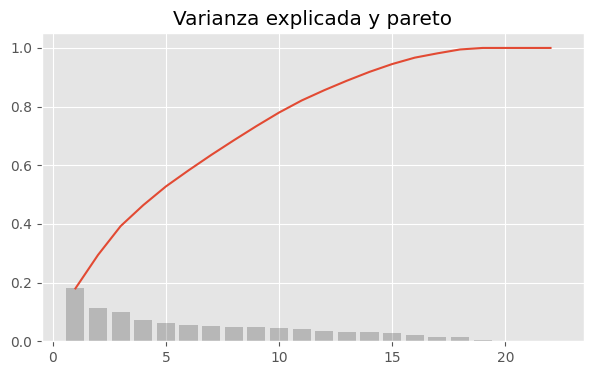

In [36]:
for i in range(len(pca.components_)):
    print('% Var. explicada ('+str(i+1)+' componentes): ', np.cumsum(pca.explained_variance_ratio_)[i]*100)

plt.bar(range(1,len(pca.components_)+1),pca.explained_variance_ratio_, alpha=.2,color='0')
plt.plot(range(1,len(pca.components_)+1),np.cumsum(pca.explained_variance_ratio_),alpha=1)
plt.title("Varianza explicada y pareto")
plt.show()

Según el gráfico podemos observar que hay tendencia a que cada componente aporta información relevante, por lo que no existe alguna relación fuerte entre variables

[Analisis de componentes](https://docs.google.com/spreadsheets/d/1HA8CO60MYLIxF_nl3UrypNKQgOjapeJbIcmWOUifmHg/edit#gid=405980346)

In [37]:
# Elegimos la componente adecuada:
pcaFin = PCA(n_components=7)
pcaFin.fit(dataFrame[rubroName])

# Para mostrar todos los campos del Data frame:
pd.set_option('display.max_columns', None)

# Valor absoluto:
abs(pd.DataFrame(pcaFin.components_,columns=rubroName))

,prodsuper,restbar,salud,vehrep,entretenimiento,tiendadepar,ropamoda,prodpersondiv,telcom,financiero,transplaerea,clubmkt,prodlocal,enseñanza,belleza,prodelectro,alqbienes,artcultura,profdiverso,hogaroficina,informatica,**
0,0.323629,0.492083,0.239510,0.062490,0.051648,0.407144,0.522022,0.189349,0.108043,0.025382,0.014395,0.017427,0.107156,0.048053,0.075225,0.262999,0.097344,0.035124,0.053835,1.807510e-33,9.037548e-34,9.037548e-34
1,0.129181,0.203518,0.116963,0.022456,0.021998,0.036538,0.109283,0.006364,0.015228,0.011390,0.005031,0.012890,0.031710,0.008870,0.022322,0.954436,0.023944,0.009320,0.012744,4.762241e-33,2.381121e-33,2.381121e-33
2,0.307907,0.497870,0.156840,0.112871,0.045626,0.091039,0.765459,0.001750,0.068712,0.010319,0.002018,0.012919,0.083895,0.007827,0.006019,0.083312,0.062620,0.003734,0.025866,5.606388e-34,2.803194e-34,2.803194e-34
3,0.130961,0.159317,0.188371,0.021539,0.026820,0.877946,0.325865,0.092611,0.002891,0.000714,0.012863,0.013938,0.004520,0.044908,0.032330,0.084323,0.156456,0.013763,0.004222,1.243575e-32,6.217876e-33,6.217876e-33
4,0.604101,0.376132,0.318260,0.000058,0.087843,0.016021,0.000013,0.008401,0.050313,0.004147,0.015034,0.021710,0.052720,0.044490,0.023900,0.019342,0.608104,0.005082,0.074079,7.812745e-33,3.906372e-33,3.906372e-33
5,0.207341,0.466186,0.395235,0.010067,0.056086,0.100047,0.107660,0.166826,0.138028,0.007064,0.010328,0.018961,0.015025,0.052361,0.023884,0.012764,0.709387,0.004249,0.065377,2.175985e-32,1.087993e-32,1.087993e-32
6,0.524672,0.125353,0.621360,0.050867,0.012997,0.019175,0.059069,0.261486,0.407993,0.013596,0.006389,0.008457,0.051852,0.104756,0.045194,0.025144,0.254598,0.000926,0.003947,5.903249e-33,2.951625e-33,2.951625e-33


Confirmamos nuestra evidencia en el gráfico de Pareto, donde: Para cada variable está asignado a cada Componente, Por tanto no existe reducción de dimensiones para nuestro estudio de canales de transacción

In [38]:
rubroNameComp = ['secBelleza','secElectro','secOscio','secTdepar','secSuper','secEntre','secSalud']
dataFrame[rubroNameComp]=pd.DataFrame(pcaFin.fit_transform(dataFrame[rubroName]),columns=rubroNameComp)
dataFrame[rubroNameComp].head()

grupoGiro,secBelleza,secElectro,secOscio,secTdepar,secSuper,secEntre,secSalud
0,0.555638,1.665725,0.325939,0.045362,-0.168203,0.095505,-0.146195
1,-0.323280,-0.040739,0.065152,-0.042467,0.049657,-0.095777,0.024576
2,0.440833,-0.300904,0.670319,0.066225,0.042325,-0.180362,-0.146090
3,-0.367925,-0.018235,0.027291,-0.022506,0.106816,-0.112469,-0.036817
4,-0.036744,-0.138315,0.218727,-0.467761,0.866158,1.713949,0.002208


#### 3.6 Modelamiento

In [39]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.metrics import pairwise_distances_argmin_min

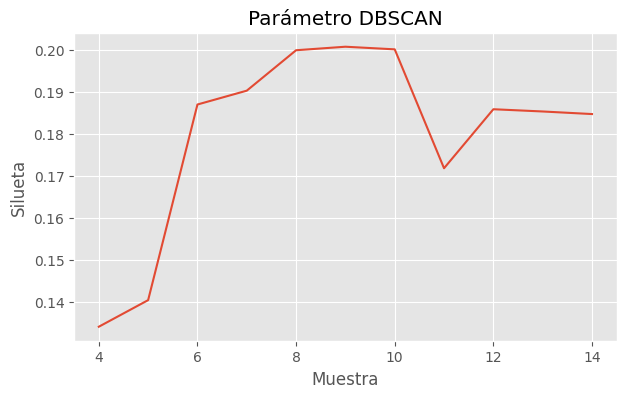

In [40]:
# Calculando el número de clúster adecuado:
X = dataFrame[rubroNameComp]

# Número de ountos mínimos (muestra)
numSam = range(4, 15)
# umbral (eps) es un radio
dbscan = [DBSCAN(eps=0.25, min_samples=i) for i in numSam]
dbscan
modDbscan = [dbscan[i].fit(X) for i in range(len(dbscan))]
modDbscan
cluster = [modDbscan[i].labels_ for i in range(len(dbscan))]
silhou  = [metrics.silhouette_score(X, cluster[i]) for i in range(len(dbscan))]

plt.plot(numSam,silhou)
plt.xlabel('Muestra')
plt.ylabel('Silueta')
plt.title('Parámetro DBSCAN')
plt.show()

In [41]:
# La mejor silueta sale de 8 a 10 puntos minimos

In [42]:
# Nos fijamos de los indicadores de Clustering:

for i in range(len(numSam)):
    print('* Posición Nro: '+str(i+1))
    print(str(numSam[i])+' puntos mínimos:')
    print('Ctd clúster: '+str(len(set(cluster[i]))))
    print('Silueta: '+str(silhou[i]))
    print("\n")

* Posición Nro: 1
4 puntos mínimos:
Ctd clúster: 41
Silueta: 0.13418781251552125


* Posición Nro: 2
5 puntos mínimos:
Ctd clúster: 27
Silueta: 0.14051180228267338


* Posición Nro: 3
6 puntos mínimos:
Ctd clúster: 20
Silueta: 0.1870417425563942


* Posición Nro: 4
7 puntos mínimos:
Ctd clúster: 19
Silueta: 0.1903329585438354


* Posición Nro: 5
8 puntos mínimos:
Ctd clúster: 15
Silueta: 0.19995116084643394


* Posición Nro: 6
9 puntos mínimos:
Ctd clúster: 12
Silueta: 0.2007862599531452


* Posición Nro: 7
10 puntos mínimos:
Ctd clúster: 12
Silueta: 0.20016328254250623


* Posición Nro: 8
11 puntos mínimos:
Ctd clúster: 13
Silueta: 0.17188189869411546


* Posición Nro: 9
12 puntos mínimos:
Ctd clúster: 13
Silueta: 0.18591742299098327


* Posición Nro: 10
13 puntos mínimos:
Ctd clúster: 13
Silueta: 0.18538413253362884


* Posición Nro: 11
14 puntos mínimos:
Ctd clúster: 13
Silueta: 0.1847706063755861




In [43]:
# Con 8 puntos minimos, me recomienda 15 clusters
# Con 10 puntos minimos, me recomienda 12 clusters

In [ ]:
#n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
#n_noise_ = list(labels).count(-1)

Visualizando los grupos en 2-D para tener alguna noción de como se agrupan, en esta ocasión probaremos distintos par de variables

In [44]:
# Vector de colores según el clúster

orden = 5
uniqueClus = set(cluster[orden-1])
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(uniqueClus))]

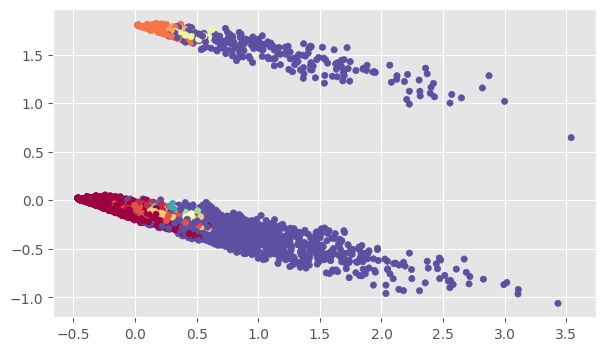

In [45]:
fig = plt.figure()
f1 = dataFrame['secBelleza'].values
f2 = dataFrame['secElectro'].values

colores=colors
asignar=[]
for row in cluster[orden-1]:
    asignar.append(colores[row])

plt.scatter(f1, f2, c=asignar, s=20)
plt.show()

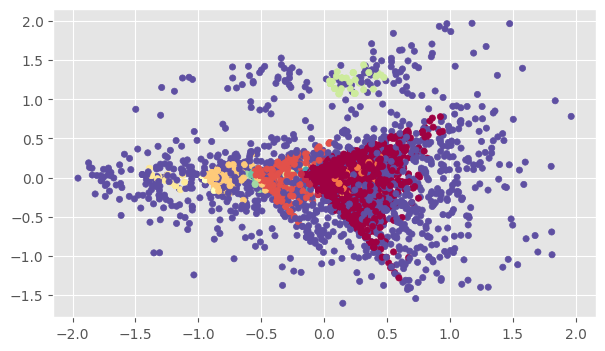

In [46]:
fig = plt.figure()
f1 = dataFrame['secOscio'].values
f2 = dataFrame['secSuper'].values

colores=colors
asignar=[]
for row in cluster[orden-1]:
    asignar.append(colores[row])

plt.scatter(f1, f2, c=asignar, s=20)
plt.show()

#### 3.7 Evaluación

In [48]:
ordenMu = [5,6,7] # de 8 a 10 puntos minimos

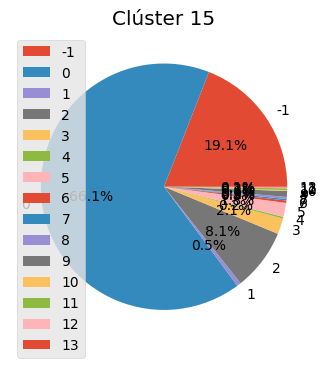

         ctdCliente  pctCliente
cluster                        
-1             1426       19.05
 0             4946       66.09
 1               40        0.53
 2              605        8.08
 3              155        2.07
 4               17        0.23
 5              138        1.84
 6               23        0.31
 7               15        0.20
 8               20        0.27
 9               58        0.77
 10               8        0.11
 11              18        0.24
 12               8        0.11
 13               7        0.09




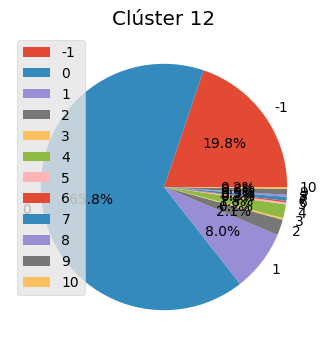

         ctdCliente  pctCliente
cluster                        
-1             1481       19.79
 0             4925       65.81
 1              602        8.04
 2              155        2.07
 3               17        0.23
 4              135        1.80
 5               20        0.27
 6               15        0.20
 7               38        0.51
 8               20        0.27
 9               58        0.77
 10              18        0.24




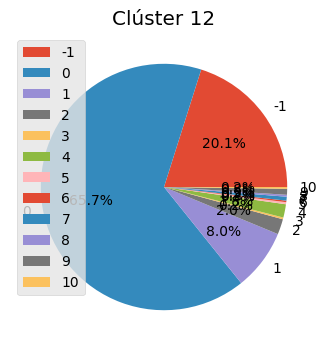

         ctdCliente  pctCliente
cluster                        
-1             1506       20.12
 0             4913       65.65
 1              598        7.99
 2              151        2.02
 3               17        0.23
 4              131        1.75
 5               20        0.27
 6               15        0.20
 7               38        0.51
 8               19        0.25
 9               58        0.77
 10              18        0.24




In [49]:
copy =  pd.DataFrame()

for i in ordenMu:
    # Distribución de los grupos por clúster:
    copy['cluster'] = cluster[i-1]

    cantidadGrupo =  pd.DataFrame()
    cantidadGrupo['ctdCliente']=copy.groupby('cluster').size()
    cantidadGrupo['pctCliente']=round(100*cantidadGrupo['ctdCliente']/cantidadGrupo['ctdCliente'].sum(),2)

    # gráfico de los grupos según su distribución:
    plt.pie(cantidadGrupo['pctCliente'], labels=cantidadGrupo.index, autopct='%1.1f%%')
    plt.title('Clúster '+ str(len(set(cluster[i-1]))))
    plt.legend()
    plt.show()
    print(cantidadGrupo)
    print('\n')

In [52]:
# Cluster -1 representa a los atipicos (los que no entraron en ningun cluster)
# Una buena distribucion debe ser por encima del 5% por cluster
# Se debera agrupar los clusters mas correlacionados

In [53]:
ordenCluster = int(input('Ingrese el orden de clúster: '))

Ingrese el orden de clúster: 7


In [54]:
# Pegamos los datos de los clústering:
dataFrame['cluster'] = cluster[ordenCluster-1]

In [55]:
# calculamos los centroides de los clusteres:
copy = pd.DataFrame()
centroide = pd.DataFrame()

copy = dataFrame
for columnName in rubroNameComp:
    centroide[columnName] = copy.groupby('cluster').agg(columnName).mean()
centroide

,secBelleza,secElectro,secOscio,secTdepar,secSuper,secEntre,secSalud
cluster,,,,,,,
-1,0.848848,-0.034805,0.049331,0.035800,-0.014413,0.063429,0.025288
0,-0.276682,-0.038562,0.060183,0.019900,-0.010088,-0.018957,-0.013697
1,0.000632,-0.092714,-0.395358,-0.150846,0.003027,-0.082330,0.011362
2,0.110157,1.776195,0.148955,-0.165352,-0.023989,-0.044101,-0.065656
3,0.258572,1.771091,0.091852,0.203376,-0.016940,-0.008653,-0.035085
4,0.263949,-0.146964,-0.835059,-0.394704,0.012226,-0.149550,0.032303
5,0.510159,-0.192367,-1.311288,-0.555654,-0.000491,-0.202972,0.078636
6,0.338580,-0.134055,-0.940238,-0.024876,-0.006656,-0.061628,0.011520
7,0.137374,-0.057126,-0.098463,1.051883,0.014145,0.105359,0.006498


<ipython-input-56-3f7a1d9fa861>:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


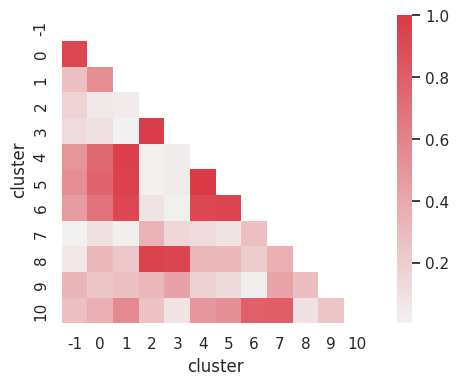

In [56]:
dfTransp = centroide.T
corr = dfTransp.corr()

def plot_correlations(corr):
    sns.set(style="white")
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(abs(corr), mask=mask, cmap=cmap, vmax=1, center=0,square=True)

plot_correlations(corr)

In [57]:
# Existen clusters muy correlacionados

##### Construimos nuestro Cluster Final

In [58]:
clusFinal =  pd.DataFrame()
clusFinal['clusterFin'] = cluster[ordenCluster-1]

In [59]:
# Actualizamos los cluster luego de la correlación de cluster anteriores
clusFinal = clusFinal.replace([4,5,6],1)
clusFinal = clusFinal.replace(10,7)
clusFinal = clusFinal.replace([3,7,8,9,10],2)

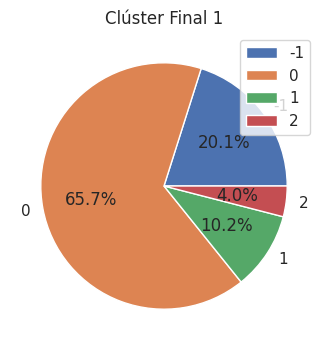

            ctdCliente  pctCliente
clusterFin                        
-1                1506       20.12
 0                4913       65.65
 1                 764       10.21
 2                 301        4.02




In [60]:
# Distribución de los grupos por clúster Final:
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['ctdCliente']=clusFinal.groupby('clusterFin').size()
cantidadGrupo['pctCliente']=round(100*cantidadGrupo['ctdCliente']/cantidadGrupo['ctdCliente'].sum(),2)

# gráfico de los grupos según su distribución:
plt.pie(cantidadGrupo['pctCliente'], labels=cantidadGrupo.index, autopct='%1.1f%%')
plt.title('Clúster Final '+ str(len(set(clusFinal))))
plt.legend()
plt.show()
print(cantidadGrupo)
print('\n')

In [61]:
# Pegamos la etiqueta Final
dataFrame['clusterFin'] = clusFinal

# calculamos los centroides de los clusteres: (el promedio)
copy = pd.DataFrame()
centroide = pd.DataFrame()

copy = dataFrame
for columnName in rubroNameComp:
    centroide[columnName] = copy.groupby('clusterFin').agg(columnName).mean()
centroide

,secBelleza,secElectro,secOscio,secTdepar,secSuper,secEntre,secSalud
clusterFin,,,,,,,
-1,0.848848,-0.034805,0.049331,0.035800,-0.014413,0.063429,0.025288
0,-0.276682,-0.038562,0.060183,0.019900,-0.010088,-0.018957,-0.013697
1,0.065755,-0.105436,-0.505427,-0.200783,0.004322,-0.096608,0.016717
2,0.102121,1.071185,0.053740,0.005697,0.225797,0.237280,0.054619


#### 3.8 Perfilamiento

En esta sección veremos que rubros o sectores comerciales estarían conformados nuestros clusters finales, esto nos ayudaría a perfilar y dar un nombre.
Pd. podría darnos mas información con otras variables (categóricas)

In [62]:
import seaborn as sns

  ******************************
       GRUPOS DEL CLUSTER 4
  ******************************


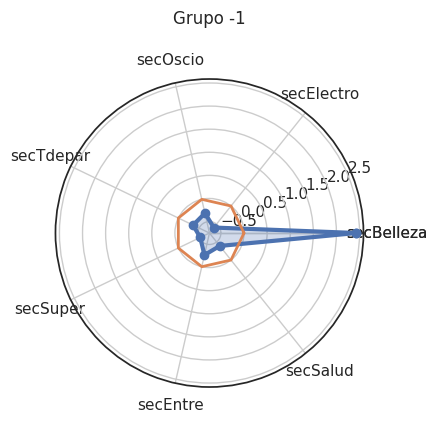

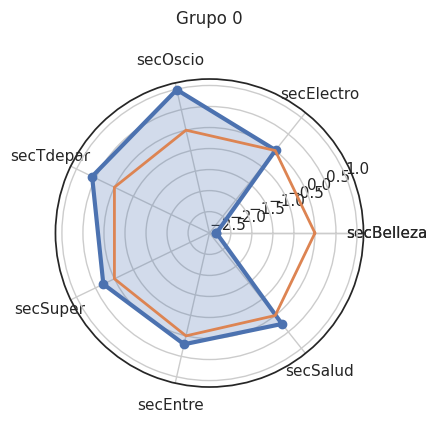

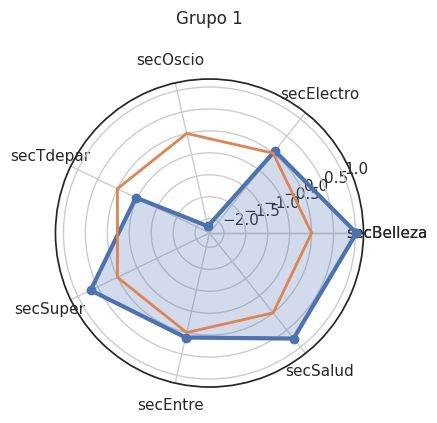

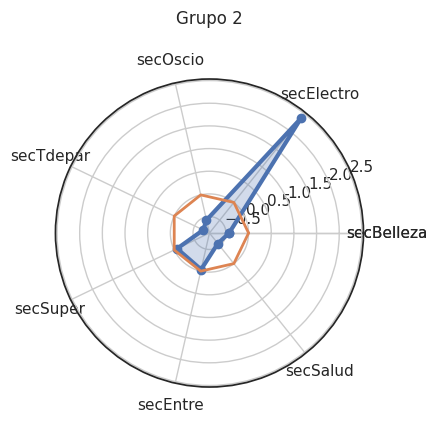

In [93]:
print('  ******************************')
print('       GRUPOS DEL CLUSTER '+str(len(set(clusFinal['clusterFin']))))
print('  ******************************')

# Tener en cuenta el clúster con etiqueta "-1" que son los anómalos
indx = clusFinal.groupby(clusFinal['clusterFin']).count().index
rubroNameComp2=np.concatenate((rubroNameComp,[rubroNameComp[0]]))

for i in indx:
    mu = centroide.loc[i].mean()
    dev= np.std(centroide.loc[i])

    stats=(centroide.loc[i].values-mu)/dev

    angles=np.linspace(0, 2*np.pi, len(rubroNameComp), endpoint=False)
    stats=np.concatenate((stats,[stats[0]]))
    ref = [0]*(len(rubroNameComp)+1)
    angles=np.concatenate((angles,[angles[0]]))

    fig=plt.figure()
    ax = fig.add_subplot(111, polar=True)
    ax.plot(angles, stats, 'o-', linewidth=3)
    ax.plot(angles, ref, '-', linewidth=2)

    ax.fill(angles, stats, alpha=0.25)
    ax.set_thetagrids(angles * 180/np.pi, rubroNameComp2)
    ax.grid(True)
    ax.set_title('Grupo '+str(i)+'\n')


In [ ]:
# Se muestran todos los sectores (7)
# en naranja: el comportamiento normal
# Azul: comportamiento del segmento especifico

# por ejemplo: cluster -1 tienen un perfil de sector belleza
# cluster 0: sector ocio , tiendas por departo (mas para jovenes)
# cluster 1: salud y belleza
# cluster 2: sector electronico

#### 3.9 Visualización

In [ ]:
# Propuesta Comercial
# ===================

# Me gustaria saber como podriamos hacer para q los clientes puedan cambiar o agregar otro sector

In [67]:
!pip install somoclu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 6.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for somoclu: filename=somoclu-1.7.6-cp310-cp310-linux_x86_64.whl size=494948 sha256=1e998fbcfb91b4e9472e81bbb0f69ae3483dd89dc3f97d28f9f42087307d9933
  Stored in directory: /root/.cache/pip/wheels/59/c3/65/d78959b2e432af6e863523efe8d1faa21111c1cc7fd4e04436
Successfully built somoclu


In [ ]:
# Esta libreria hara un mapa de los clusters generados.
# Para que el sector A llegue al secto B mostrara un camini

In [68]:
# Ingresar a la Terminal de Jupiter e installar el paquete "somoclu"
# pip install somoclu
import somoclu

In [69]:
npData = dataFrame[rubroNameComp]
dfCluster=pd.DataFrame(clusFinal['clusterFin'])

copy= pd.DataFrame()
copy = dfCluster
dfCluster.loc[dfCluster["clusterFin"]==-1]='red'
dfCluster.loc[dfCluster["clusterFin"]== 0]='blue'
dfCluster.loc[dfCluster["clusterFin"]== 1]='green'
dfCluster.loc[dfCluster["clusterFin"]== 2]='cyan'


npData = np.array(npData)
listCluster = list(dfCluster["clusterFin"])
labels=range(dataFrame.shape[0])

In [72]:
som = somoclu.Somoclu(100, 100, data=npData)
%time som.train()

CPU times: user 1min 17s, sys: 268 ms, total: 1min 17s
Wall time: 1min 4s


Esta visualización no s ayuda a ver cómo un segmento podría migrar a otro segmento según a la estrategia comercial que la empresa quisiera gestionar.

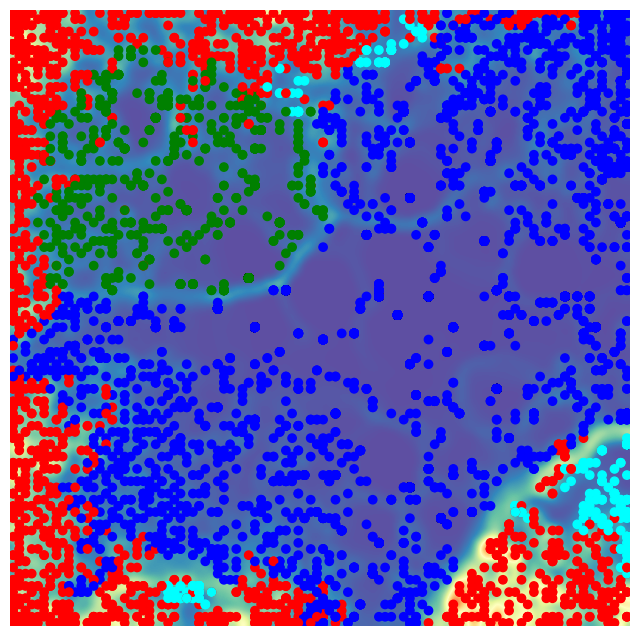

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

In [73]:
som.view_umatrix(bestmatches=True, bestmatchcolors=listCluster)

In [ ]:
# Quiero que el segmento celeste (que da menor ticket promedio) se convierta en verde
# la recomendacion seria que evolucione a que sea sector azul primero y luego ya darle
# oferta del sector verde

[Analisis Excel](https://docs.google.com/spreadsheets/d/1isGDQgq_DGqtzNEFEUSnlfd-bbQ5tznOX3ALYmY9ERk/edit#gid=2086367667)